Qiteng Feng, 1004739884

# Project One

## Introduction



It is a common stereotype in the United States that private schools generally have better teaching quality than public schools. In the book, 'All else equal: are public and private schools different?' (Benveniste, Carnoy, Rothstein, 2003), authors stated public schools became representative of pejorative labels such as large class sizes, unqualified teachers, antiquated curriculum, and lack of parental involvement.

However, not all public high schools are as stereotypical as they should be. Some public high schools in New York City also have outstanding performances, such as Stuyvesant High School, Staten Island Technical High School, and Bronx High School of Science, according to U.S. News ranking(2023). This study aims to find the common features of NYC's top public high schools and attempt to make recommendations to the government for improving the quality of education in other public high schools through the result. The dataset comes from NYC Open Data Website with 435 observations and 22 columns. 

This study found that most public high schools with high educational quality are concentrated in the Manhattan area, and have a predominantly white or Asian student population. Conversely, public schools located in Central Brooklyn and the Bronx dominated by Black and Hispanic students tended to perform worse in average SAT scores compared to other schools. 

## Data Loading/Cleaning

### Setting up the project

In this study, the dependent variable is the average total SAT score, combined math, reading, and writing scores. The independent variables are the borough of school location, the percentage of tested students, and the shares of minorities (Black, Hispanic, and Asian). The school's educational quality is measured by its average total SAT score. 

Additionally, location, percentage of tested students, and the shares of minorities are assumed related to the educational quality. The quality of education in public schools and local government spending on education are closely linked, so the area where the school is located is correlated with the school's average SAT score. Students who take the SAT exam might have a stronger desire to attend college, so they will be more willing to study hard. A higher percentage of students participating in the SAT exam indicates a better learning environment in this school and positively influences the average SAT score. Finally, previous studies have pointed out that ethnic ratios in U.S. schools affect the quality of teaching. For example, Goyette (2012) said that school quality decreased according to racial change, further contributing to neighborhood segregation. Besides, Wagenknecht's (2018) study shows that increasing black and Hispanic students might threaten school quality. Thus, the shares of minorities are expected to correlate with the average SAT score. 

Through analyzing independent variables, the weaknesses of public schools are identified so that the government can target its assistance and enhance public school quality.

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point

from adjustText import adjust_text

# import data
raw_data = pd.read_csv("/Users/ricardo/ECO225Project/Data/scores.csv")

### Data Cleaning

In [2]:
# remove missing value
df=raw_data.dropna()
df=df.reset_index().drop('index',axis=1)

# calculate the length of time in school
start_time = []
for t1 in df['Start Time']:
    hour=int(t1[0])
    minute=int(t1[2:4])
    time=hour*60+minute
    start_time.append(time)
end_time = []
for t2 in df['End Time']:
    hour=int(t2[0])
    minute=int(t2[2:4])
    time=(hour+12)*60+minute
    end_time.append(time)
hours_in_school= (pd.Series(end_time)-pd.Series(start_time))/60

df['Hours in School']=hours_in_school

# calculate the total SAT score
df['Average Total SAT']=df['Average Score (SAT Math)']+df['Average Score (SAT Reading)']+df['Average Score (SAT Writing)']
df['Average Total SAT']=df['Average Total SAT'].astype(int)

# convert zip code to string
df['Zip Code'] = df['Zip Code'].astype(str)

#convert percentage from string  to float
percent_white=[]
for precent in df['Percent White']:
    pre=float(precent[:-1])
    percent_white.append(pre)
df['Percent White']=percent_white

percent_black=[]
for precent in df['Percent Black']:
    pre=float(precent[:-1])
    percent_black.append(pre)
df['Percent Black']=percent_black

percent_Hispanic=[]
for precent in df['Percent Hispanic']:
    pre=float(precent[:-1])
    percent_Hispanic.append(pre)
df['Percent Hispanic']=percent_Hispanic

percent_Asian=[]
for precent in df['Percent Asian']:
    pre=float(precent[:-1])
    percent_Asian.append(pre)
df['Percent Asian']=percent_Asian

percent_tested=[]
for precent in df['Percent Tested']:
    pre=float(precent[:-1])
    percent_tested.append(pre)
df['Percent Tested']=percent_tested


## Summary Statistics Tables 

### Table 1: Average Total SAT Score & Percentage of Tested Students

In [3]:
dt_1=df[['Average Total SAT','Percent Tested']]
dt_1.describe()

,Average Total SAT,Percent Tested
count,374.000000,374.000000
mean,1275.347594,64.735294
std,194.866056,18.860023
min,924.000000,18.500000
25%,1157.000000,50.725000
50%,1226.000000,63.800000
75%,1327.000000,79.500000
max,2144.000000,100.000000


The mean average total SAT score for NYC public schools is 1275.35, which is greater than the median of 1226. It indicated that the distribution of NYC public schools is right skewed, and most public school quality is deficient. However, the max average SAT score is 2144, which also states that few excellent public schools exist.

The mean and median percentage of tested students is around 64%. The lowest rate is 18.5%, while the highest is 100%. This statistics imply that most public school students do not exhibit a preference for pursuing higher education in college.

### Table 2: Shares of Minorities

In [4]:
dt_2=df[['Percent Asian','Percent Black','Percent Hispanic']]
dt_2.describe()

,Percent Asian,Percent Black,Percent Hispanic
count,374.000000,374.000000,374.000000
mean,10.412567,35.387166,43.929679
std,14.400556,25.367159,24.495584
min,0.000000,0.000000,2.600000
25%,1.600000,16.400000,20.825000
50%,4.200000,28.750000,45.300000
75%,11.150000,50.100000,63.375000
max,88.900000,91.200000,100.000000


The average proportions of Asian, Black, and Hispanic students in public schools are 10.4%, 35.4%, and 44%, respectively. This indicates that Asian students are generally underrepresented in public schools. Furthermore, the majority of students in public schools are Black and Hispanic. Additionally, the distribution of proportions of Asian and Black students is right-skewed, implying that they constitute a relatively small share of students in most schools, but are highly concentrated in a few. The ethnicity percentage is a crucial factor for the study, as it can help determine the government's strategies for improving the quality of education in public schools.

### Table 3: Borough

In [5]:
# count school number for each borough
dt_3 = df['Borough'].value_counts().rename_axis('Borough').reset_index(name='counts')
dt_3

,Borough,counts
0,Brooklyn,109
1,Bronx,98
2,Manhattan,89
3,Queens,68
4,Staten Island,10


After removing the missing value, there are 374 observations exist. Brooklyn has the largest number of public schools, with 109. The number for Bronx, Manhattan, and Queens are 98,89, and 68, respectively. Staten Island only has 10 public schools. The number of public schools in a district is significant for this study, which can imply the importance the local government places on education.

## Plots, Histograms, Figures

### Plot 1: Borough

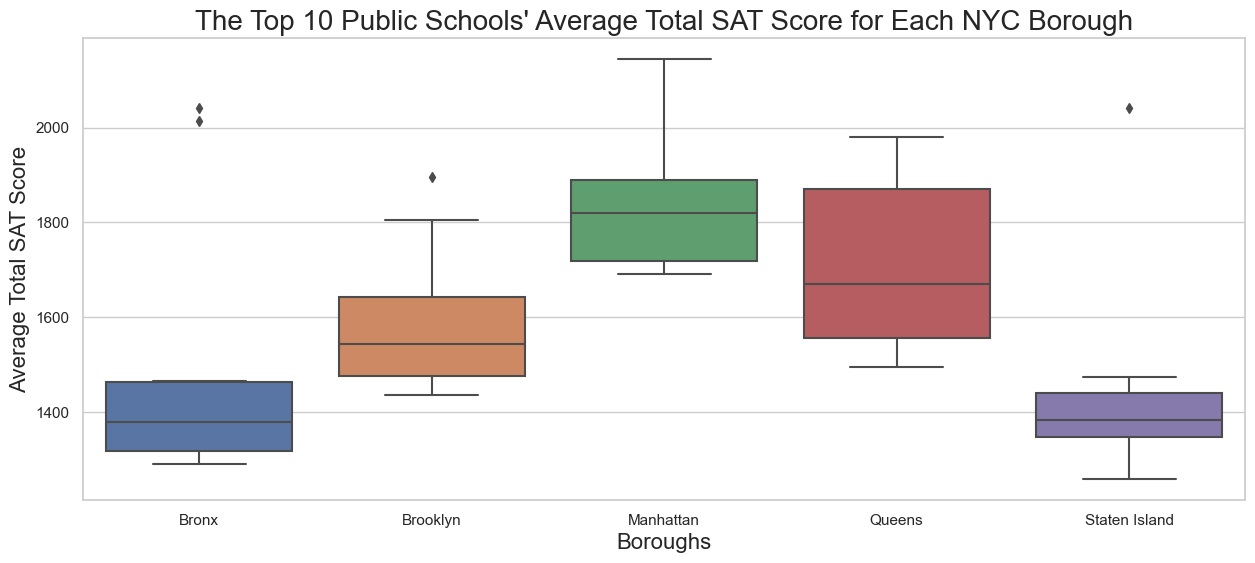

In [18]:
# select top 10 schools for each borough
dt_borough = df.groupby('Borough')['Average Total SAT'].nlargest(10).reset_index().drop('level_1',axis=1)

sns.set(style="whitegrid")

# make a boxplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot( x='Borough', y='Average Total SAT',data=dt_borough)
plt.title("The Top 10 Public Schools' Average Total SAT Score for Each NYC Borough", fontsize=20)
plt.xlabel('Boroughs', fontsize=16)
plt.ylabel('Average Total SAT Score', fontsize=16)
plt.show()

Plot 1 is a boxplot that presents the average total SAT scores for the top 10 public schools in each borough. According to the plot, schools in Manhattan have the highest mean score, exceeding 1800, whereas those in the Bronx and Staten Island have the lowest, averaging less than 1400. This indicates that educational resources are unevenly distributed across various regions, with only one or two exceptional schools in the Bronx and Staten Island, while the majority are mediocre. Moreover, the boxplot demonstrates that the distribution of scores in Queens is more spread out, with greater variability compared to other boroughs. The interquartile range (IQR) of scores for Queens is also wider than other boroughs, indicating a greater range of achievement levels among top-performing schools in the borough. Conversely, the IQR of scores for the Bronx and Staten Island is narrower, suggesting a more homogenous distribution of scores among top-performing schools in those boroughs.

### Plot 2: Share of Minorities

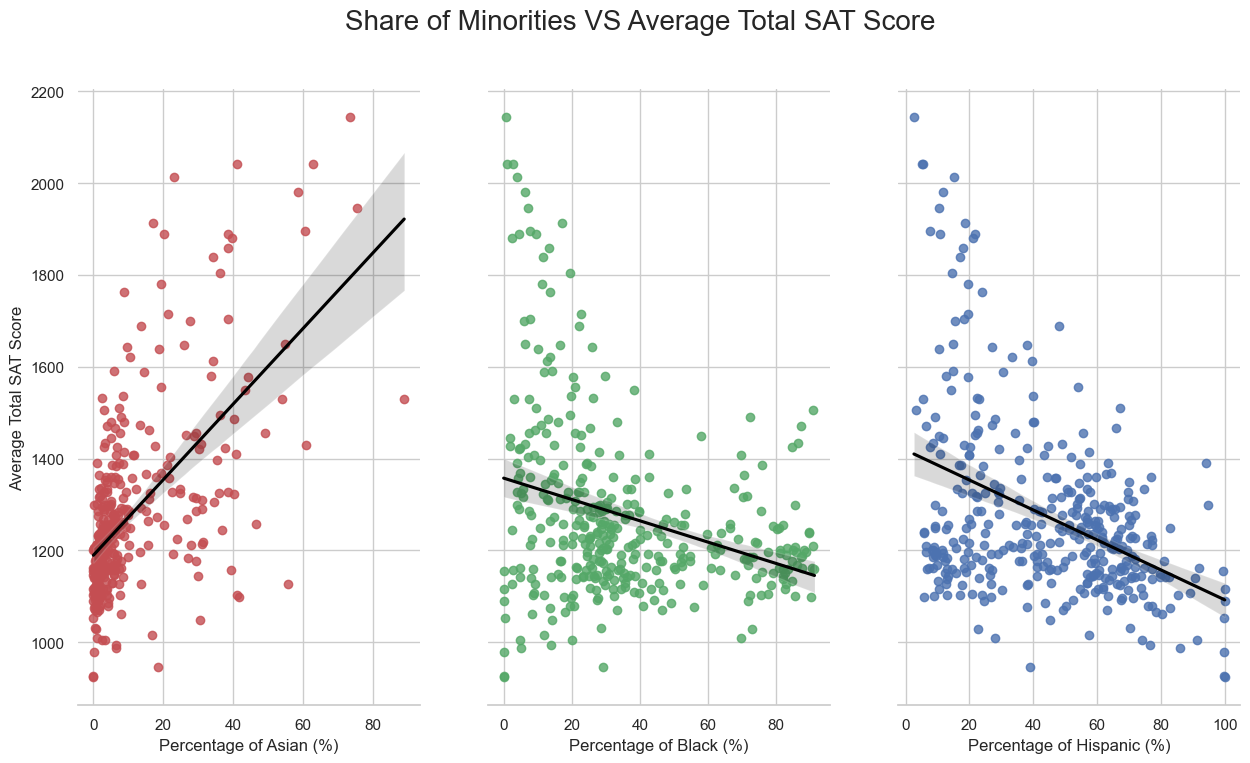

In [7]:
# Make scatterplots with regression lines
fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
sns.despine(left=True)

sns.regplot(x=df['Percent Asian'], y=df['Average Total SAT'], 
            color='r', ax=ax[0], line_kws={"color": "black"})

sns.regplot(x=df['Percent Black'], y=df['Average Total SAT'], 
            color='g', ax=ax[1], line_kws={"color": "black"})

sns.regplot(x=df['Percent Hispanic'], y=df['Average Total SAT'], 
            color='b', ax=ax[2], line_kws={"color": "black"})

ax[0].set_xlabel('Percentage of Asian (%)')
ax[1].set_xlabel('Percentage of Black (%)')
ax[2].set_xlabel('Percentage of Hispanic (%)')
ax[0].set_ylabel('Average Total SAT Score')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

fig.suptitle('Share of Minorities VS Average Total SAT Score',fontsize=20)
plt.subplots_adjust(hspace=0.4)
plt.show()

The scatter plots display the correlation between the percentage of minorities and the average SAT score for the school. The y-axis indicates the average total SAT score, while the x-axis displays the percentage of minorities, with red representing Asian, green representing Black, and blue representing Hispanic students.
The analysis reveals that there is a positive correlation between the percentage of Asian students and the average SAT score. In contrast, there is a negative correlation between the percentage of Black and Hispanic students and the average SAT score. This suggests that schools with a higher percentage of Asian students tend to perform better on the SAT, while schools with a higher percentage of Black and Hispanic students tend to perform worse on the test. These findings indicate that the ethnic composition of a school may have an impact on its average SAT score.

### Plot 3: Percentage of Tested Student

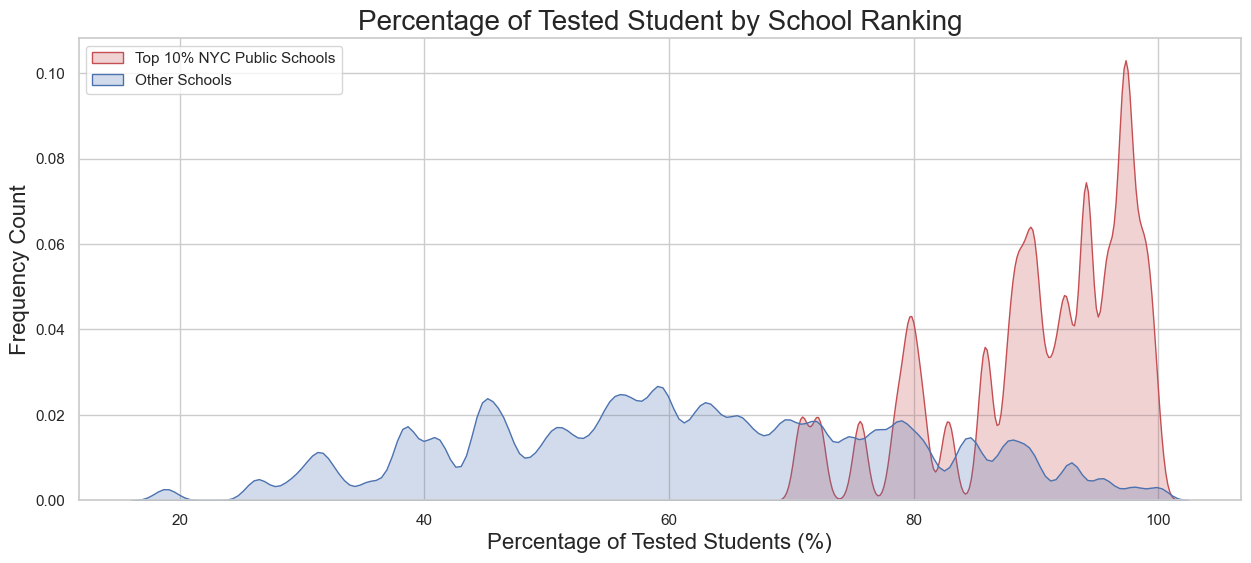

In [8]:
# Divide observation into two groups based on their SAT score
df['School Rankings']=['Top 10% NYC Public Schools' if x > df['Average Total SAT'].quantile(0.90) else 'Other Schools' for x in df['Average Total SAT']]

# Make a kernel density estimate plot
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(df.loc[(df['School Rankings'] =='Top 10% NYC Public Schools'),'Percent Tested'] ,
               color='r',shade=True, bw_adjust=0.15, ax=ax, label='Top 10% NYC Public Schools')
sns.kdeplot(df.loc[(df['School Rankings'] == 'Other Schools'),'Percent Tested'] ,
               color='b',shade=True, bw_adjust=0.15, ax=ax, label='Other Schools')
plt.title("Percentage of Tested Student by School Ranking", fontsize=20)
plt.xlabel("Percentage of Tested Students (%)", fontsize=16)
plt.ylabel("Frequency Count", fontsize=16)
plt.legend(loc='upper left')
plt.show()

In Plot 3, we can see a kernel density estimate plot that displays the distribution of the percentage of tested students for the top 10% of public schools in red and the remaining schools in blue. The plot indicates that the percentage of tested students for the top 10% of schools is heavily concentrated between 90% and 100%, while for the rest of the schools, the percentage of tested students is normally distributed around 60%. The plot suggests that high-performing schools have a higher percentage of students who take the SAT exams, which is an indicator of the students' motivation and engagement. Therefore, the high percentage of tested students is a crucial factor in determining a school's quality.

# Project Two

## The Message

The objective of this study is to investigate the differences between high-performing and inferior public schools and to identify areas where the government can enhance public high school education and provide targeted assistance. Previous analysis shows that the ethnic makeup of a school has a significant impact on its academic performance. Schools with a predominantly Asian and white student population generally have higher average SAT scores, whereas schools with predominantly Black and Hispanic students tend to perform poorly, which Plot 4 compares the average ethnic composition of excellent and remaining schools. Therefore, the government should allocate more funding to improve the quality of teaching and learning in public schools with a predominantly Black and Hispanic student population.

### Plot 4: Share of Race in NYC Public Schools

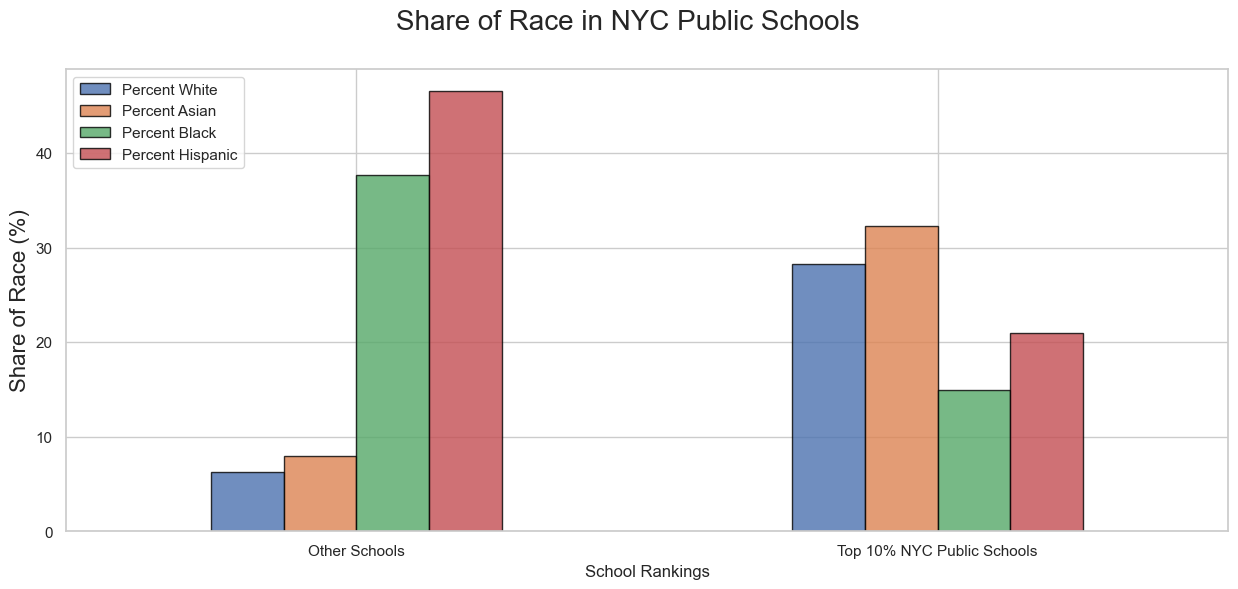

In [9]:
# groupby data by subgroups
df_group = df.groupby('School Rankings').mean()
df_group = df_group[['Percent White','Percent Asian','Percent Black','Percent Hispanic']]

# make a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
df_group.plot(kind="bar", ax=ax, edgecolor="black", rot=0, alpha = 0.8)
ax.legend(loc='upper left')
plt.ylabel('Share of Race (%)', fontsize=16)
fig.suptitle('Share of Race in NYC Public Schools',fontsize=20)
plt.show()

Plot 4 displays a bar chart illustrating the distribution of race in New York City public schools. The schools are categorized into two groups: the top 10% of NYC public schools and the remaining schools. In the top 10% NYC public schools, the majority of students are either Asian or white, accounting for approximately 30% on average, respectively. The percentage of Black students is the lowest, at around 15% on average. Conversely, in the remaining schools, the situation is entirely different. The highest percentages of students are Black and Hispanic, with Hispanic students averaging over 45%. Asians and whites, on the other hand, both average less than 10%.

Thus, it can be inferred that public schools are primarily composed of Black and Hispanic students, while a minority of White and Asian students opt for public schools. Furthermore, the public schools selected by White and Asian students tend to have better educational quality.

## Maps and Interpretations

### Map 1: Top 10 Public School in New York City

In [10]:
# convert the data to geodataframe
df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df_top10 = df.nlargest(10,'Average Total SAT')
gdf = gpd.GeoDataFrame(df_top10, geometry="Coordinates")

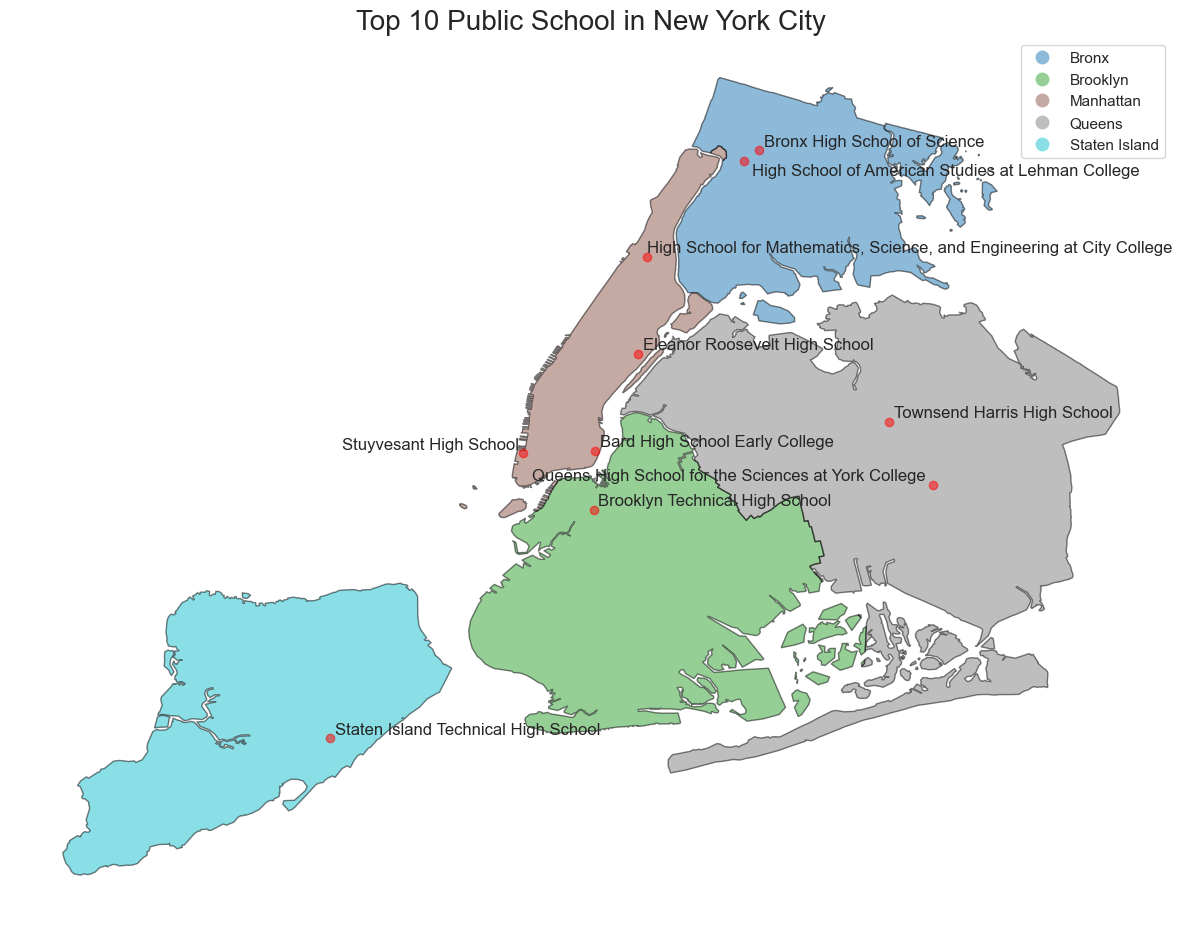

In [11]:
# shape file of NYC
nyc = gpd.read_file('/Users/ricardo/ECO225Project/Data/nyc/nyu_2451_34490.shp')

# make a map
fig, gax = plt.subplots(figsize=(15,15))
nyc.plot(ax=gax, edgecolor='black',column='bname',alpha = 0.5, legend=True)

# Label the schools
gdf.plot(ax=gax, color='red', alpha = 0.5, legend = True)
texts = []
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['School Name']):
        texts.append(plt.text(x, y, label, size=12))
adjust_text(texts)

gax.set_title('Top 10 Public School in New York City',fontsize=20)
plt.axis('off')
plt.show()

Map 1 illustrates the location of the top ten public schools in New York City based on their average SAT scores. Notably, four of these schools are situated on Manhattan Island, whereas only one or two are located in each of the other four Boroughs. This disparity highlights the unequal distribution of educational resources across the city, with Manhattan Island having more abundant educational opportunities and a greater number of high-quality public high schools.

### Map 2: Average Total SAT for Each Zip

In [12]:
# shape file of NYC zip code level
nyc_zip = gpd.read_file('/Users/ricardo/ECO225Project/Data/ZIP_CODE_040114/ZIP_CODE_040114.shp')
df_zip=df.groupby('Zip Code').mean()
nyc_zip_merge = nyc_zip.merge(df_zip, left_on="ZIPCODE", right_on="Zip Code", how="left")

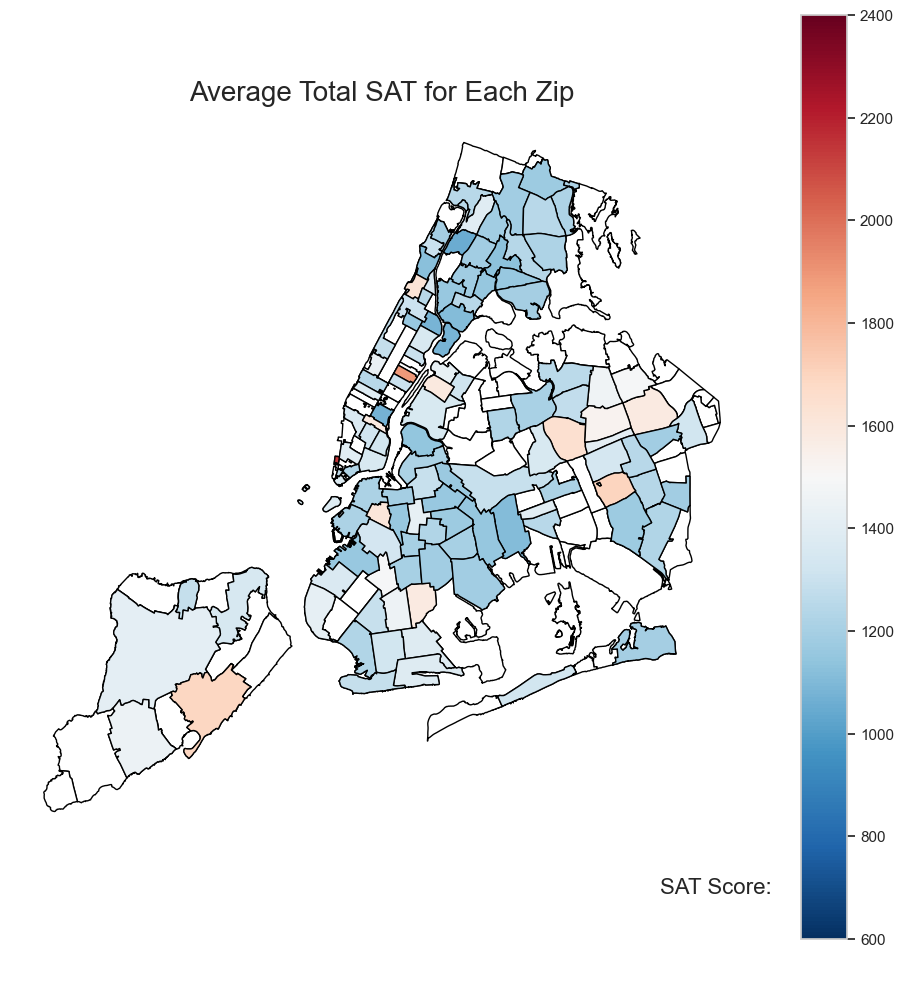

In [13]:
# make a map
fig, gax = plt.subplots(figsize=(12,12))
nyc_zip.plot(ax=gax, edgecolor='black',color='white')

nyc_zip_merge.plot(
    ax=gax, edgecolor='black', column='Average Total SAT', legend=True, cmap='RdBu_r',
    vmin=600, vmax=2400)

# Add text
gax.annotate('SAT Score:',xy=(0.55, 0.08),  xycoords='figure fraction', fontsize=16)

gax.set_title('Average Total SAT for Each Zip',fontsize=20)
plt.axis('off')
plt.show()

Map 2 provides a more comprehensive view by presenting the performance of public schools in each zip through a heat map. The intensity of the color indicates the average SAT score of the zip, with regions in red having higher scores and those in blue having lower scores. The map reveals that, on average, public schools located in the middle areas of Brooklyn and the Bronx underperformed in comparison to other regions.

### Map 3: Average Share of Blacks in Public Schools for Each Zip

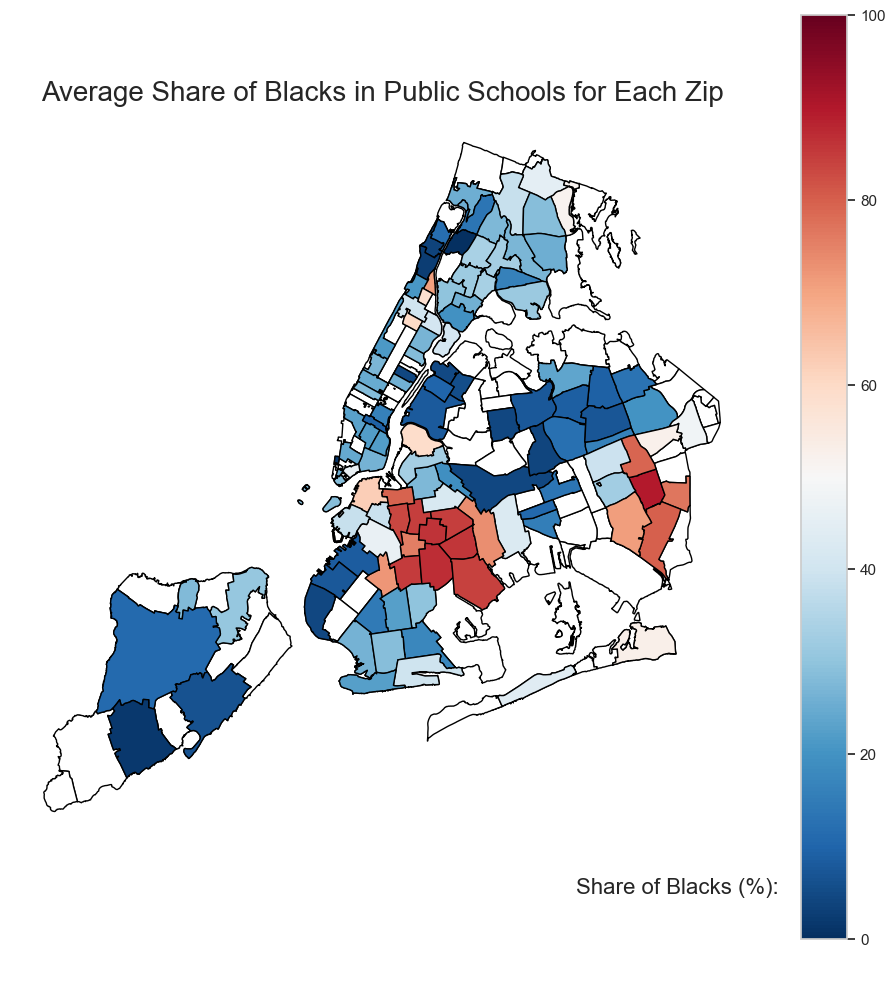

In [14]:
# make a map 
fig, gax = plt.subplots(figsize=(12,12))
nyc_zip.plot(ax=gax, edgecolor='black',color='white')

nyc_zip_merge.plot(
    ax=gax, edgecolor='black', column='Percent Black', legend=True, cmap='RdBu_r',
    vmin=0, vmax=100)

# Add text
gax.annotate('Share of Blacks (%):',xy=(0.48, 0.08),  xycoords='figure fraction', fontsize=16)

gax.set_title('Average Share of Blacks in Public Schools for Each Zip',fontsize=20)
plt.axis('off')
plt.show()

Map 3 displays the mean percentage of Black students in public high schools across different zip codes, and it is observed that schools in Central Brooklyn and Eastern Queens have a higher concentration of Black students. This observation is consistent with the findings of Map 2,  that schools in these areas generally exhibit lower levels of educational quality when compared to schools located in other regions. The concentration of Black students in these areas may be a reflection of the city's historic patterns of residential segregation and socioeconomic inequality, which have resulted in uneven access to quality educational resources and opportunities. The government could focus on providing additional support and resources to schools in these areas to improve educational outcomes and address disparities in academic achievement.

### Map 4: Average Share of Hispanic in Public Schools for Each Zip

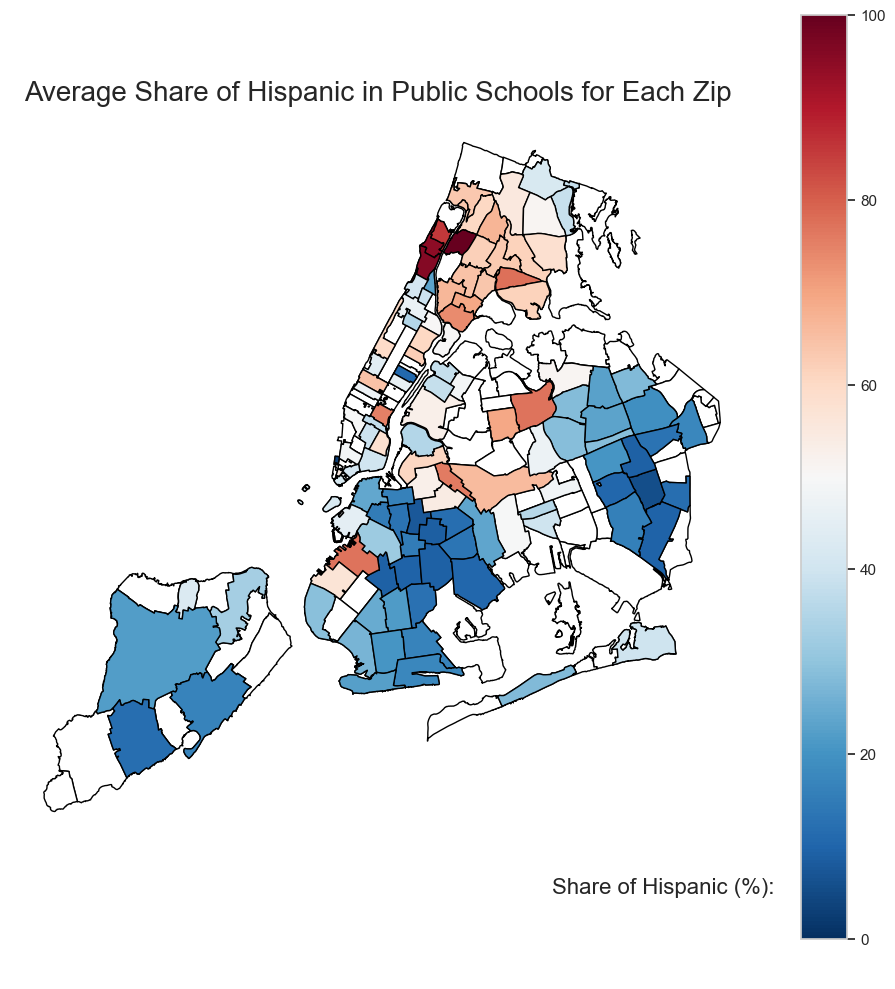

In [15]:
# make a map
fig, gax = plt.subplots(figsize=(12,12))
nyc_zip.plot(ax=gax, edgecolor='black',color='white')

nyc_zip_merge.plot(
    ax=gax, edgecolor='black', column='Percent Hispanic', legend=True, cmap='RdBu_r',
    vmin=0, vmax=100)

# Add text 
gax.annotate('Share of Hispanic (%):',xy=(0.46, 0.08),  xycoords='figure fraction', fontsize=16)

gax.set_title('Average Share of Hispanic in Public Schools for Each Zip ',fontsize=20)
plt.axis('off')
plt.show()

Map 4 indicates that public schools in the Bronx have a high percentage of Hispanic students, which is often associated with lower academic performance and educational outcomes. Moreover, the lower average SAT scores of Hispanic-dominated schools in the Bronx suggest that these students face challenges in accessing quality education comparing with other whites or Asian dominated schools. 

### Merging with a New Dataset

In addition to shares of minorities, the school's graduation rate will also correlate with average SAT score. Allensworth, Healey, Gwynne, and Crespin (2016) point out that the increase in graduation rates in Chicago public high schools has been accompanied by an increase in student academic proficiency in the fourth argument of their study on Chicago public high schools. Schools with higher graduation rates may have a larger pool of students who are academically inclined, motivated, and prepared to take the SAT. These students may be more likely to score well on the test, which could result in a higher average SAT score for the school. Hence, a data called '2018 DOE High School Directory' with high school graduation rate form NYC Open Data website is merged into the dataframe.

In [16]:
new_data = pd.read_csv("/Users/ricardo/ECO225Project/Data/2018_DOE_High_School_Directory.csv")
new_data=new_data[['location','graduation_rate']].dropna().reset_index().drop('index',axis=1)
location=[]
for i in new_data['location']:
    a=i.split()
    location.append(a[-2][0:5])
new_data['location']=location
new_data['Graduation Rate']=new_data['graduation_rate']*100
new_data = new_data.groupby('location').mean()
nyc_zip_merge = nyc_zip.merge(new_data, left_on="ZIPCODE", right_on="location", how="left")

### Map 5: Average Graduation Rate in High Schools for Each Zip

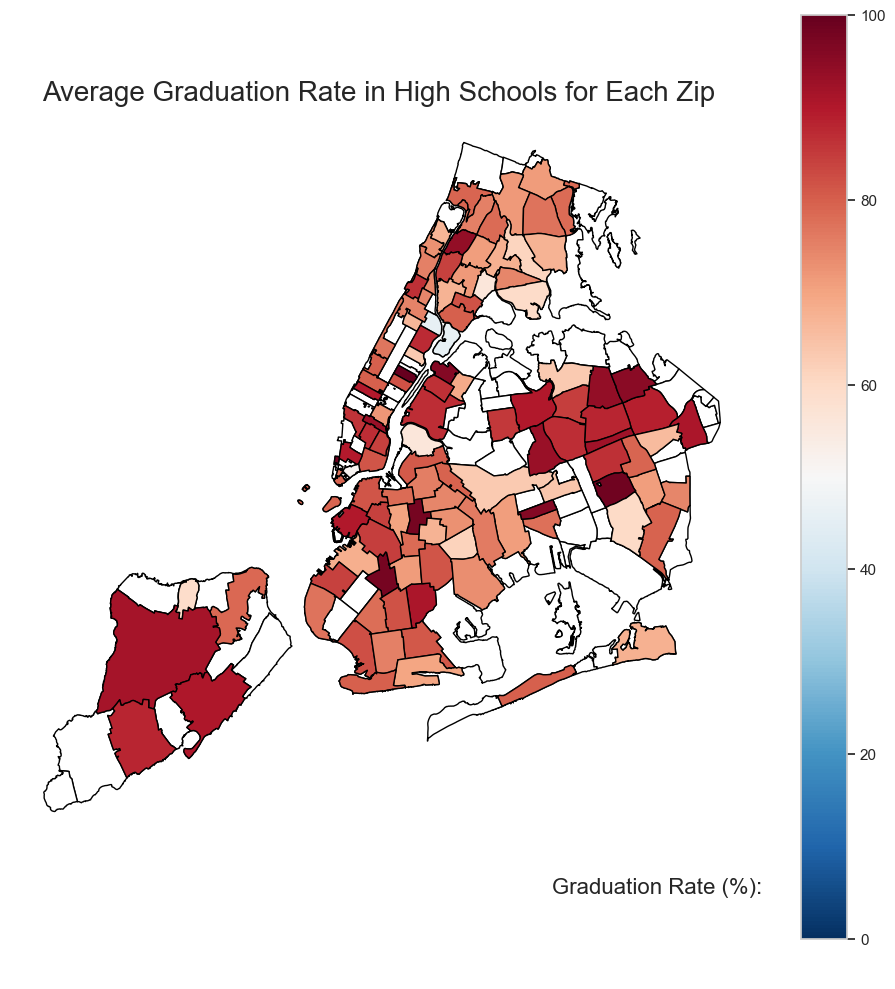

In [17]:
fig, gax = plt.subplots(figsize=(12,12))
nyc_zip.plot(ax=gax, edgecolor='black',color='white')

nyc_zip_merge.plot(
    ax=gax, edgecolor='black', column='Graduation Rate', legend=True, cmap='RdBu_r',
    vmin=0, vmax=100)

# Add text 
gax.annotate('Graduation Rate (%):',xy=(0.46, 0.08),  xycoords='figure fraction', fontsize=16)

gax.set_title('Average Graduation Rate in High Schools for Each Zip ',fontsize=20)
plt.axis('off')
plt.show()

Map 5 displays the graduation rates of schools in different regions, where lighter colors represent lower graduation rates. The areas of Central Brooklyn and the Bronx exhibit significantly lower graduation rates compared to other regions, which aligns with the findings observed in Map 2.

## Conclusion

In conclusion, this study reveals that the ethnic composition of public schools plays a crucial role in their academic performance, with predominantly white and Asian schools usually outperforming schools with predominantly black and Hispanic students. The analysis also indicates that good public schools have higher SAT participation rates and graduation rates. Therefore, the government should allocate more resources to improve the quality of public schools in areas such as Central Brooklyn and the Bronx, where schools tend to have a higher proportion of black and Hispanic students and lower academic performance. Encouraging higher SAT participation rates and improving graduation rates could be effective ways to motivate students to learn and enhance the overall academic performance of these schools. Additionally, more efforts should be made to address the uneven distribution of educational resources and promote more equity in the public education system.


## Bibliography

1.Allensworth, E. M., Healey, K., Gwynne, J. A., &amp; Crespin, R. (2016, May 31). High school graduation rates through two decades of district change: The influence of policies, Data Records, and demographic shifts. research report. University of Chicago Consortium on School Research. https://eric.ed.gov/?id=ED568549 

2.Benveniste, L., Carnoy, M., &amp; Rothstein, R. (2003). All else equal: Are public and private schools different? RoutledgeFalmer.
    
3.Goyette, K. A., Farrie, D., &amp; Freely, J. (2012). This school's gone downhill:Racial Change and Perceived School Quality among Whites. Social Problems, 59(2), 155–176. https://doi.org/10.1525/sp.2012.59.2.155

4.NYC Open Data. (2017, October 23). 2018 DOE High School Directory: NYC Open Data. 2018 DOE High School Directory | NYC Open Data. https://data.cityofnewyork.us/Education/2018-DOE-High-School-Directory/vw9i-7mzq 
    
5.U.S. News. (2023). Best high schools in New York - US news. Retrieved from https://www.usnews.com/education/best-high-schools/new-york 
    
6.Wagenknecht, Jared (2018). School Racial Composition and Its Effects on Parental Perceptions of School Quality. ISBN:978-0-438-26079-5
